In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
import pandas as pd

In [41]:
data = pd.read_csv('/content/drive/MyDrive/semester files/semester-5/DA/DATASETS/Adidas_USSales_Datasets_8thquestion (1).csv')
data.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,1/1/2020,Northeast,New York,New York,Men's Street Footwear,$50.00,"1,200","$600,000","$300,000",50%,In-store
1,Foot Locker,1185732,1/2/2020,Northeast,New York,New York,Men's Athletic Footwear,$50.00,"1,000","$500,000","$150,000",30%,In-store
2,Foot Locker,1185732,1/3/2020,Northeast,New York,New York,Women's Street Footwear,$40.00,"1,000","$400,000","$140,000",35%,In-store
3,Foot Locker,1185732,1/4/2020,Northeast,New York,New York,Women's Athletic Footwear,$45.00,850,"$382,500","$133,875",35%,In-store
4,Foot Locker,1185732,1/5/2020,Northeast,New York,New York,Men's Apparel,$60.00,900,"$540,000","$162,000",30%,In-store


In [42]:
# # a)	List all the products sold in every region.
print("products sold in every region : \n")
data1 = data[['Region','Product']].pivot_table(index=['Region','Product'])
data1

products sold in every region : 



Empty DataFrame
Columns: []
Index: [(Midwest, Men's Apparel), (Midwest, Men's Athletic Footwear), (Midwest, Men's Street Footwear), (Midwest, Women's Apparel), (Midwest, Women's Athletic Footwear), (Midwest, Women's Street Footwear), (Northeast, Men's Apparel), (Northeast, Men's Athletic Footwear), (Northeast, Men's Street Footwear), (Northeast, Women's Apparel), (Northeast, Women's Athletic Footwear), (Northeast, Women's Street Footwear), (South, Men's Apparel), (South, Men's Athletic Footwear), (South, Men's Street Footwear), (South, Women's Apparel), (South, Women's Athletic Footwear), (South, Women's Street Footwear), (Southeast, Men's Apparel), (Southeast, Men's Athletic Footwear), (Southeast, Men's Street Footwear), (Southeast, Women's Apparel), (Southeast, Women's Athletic Footwear), (Southeast, Women's Street Footwear), (West, Men's Apparel), (West, Men's Athletic Footwear), (West, Men's Street Footwear), (West, Women's Apparel), (West, Women's Athletic Footwear), (West, Women's Street Footwear)]

In [43]:
# b)	Find the Cities & the retailers who sold womens related products.
print("Cities & the retailers who sold womens related products : ")
print(data.loc[data['Product'].str.contains('Women',case=False),['Retailer ID','City']].drop_duplicates())

Cities & the retailers who sold womens related products : 
      Retailer ID           City
2         1185732       New York
70        1197831       New York
73        1197831        Houston
142       1128299        Houston
145       1128299  San Francisco
...           ...            ...
3528      1185732       Hartford
3600      1185732     Providence
3672      1185732         Boston
3744      1185732     Burlington
3816      1185732     Manchester

[76 rows x 2 columns]


In [44]:
# c)	Find the total sales of each womens product in in-store method.
print("total sales of each womens product in in-store method : ")
print(data.loc[(data['Product'].str.contains('Women',case=False))
               & (data['Sales Method'] == 'In-store'),['Product','Total Sales']].drop_duplicates())

total sales of each womens product in in-store method : 
                        Product Total Sales
2       Women's Street Footwear    $400,000
3     Women's Athletic Footwear    $382,500
5               Women's Apparel    $500,000
538     Women's Street Footwear    $357,500
539   Women's Athletic Footwear    $270,000
...                         ...         ...
3804  Women's Athletic Footwear    $195,000
3806            Women's Apparel    $318,750
3809    Women's Street Footwear    $130,000
3833    Women's Street Footwear    $178,750
3842            Women's Apparel    $332,500

[363 rows x 2 columns]


In [45]:
# d)	For each product, find region wise total sales & units sold.
data['Total Sales'] = pd.to_numeric(data['Total Sales'].str.replace('[^0-9]',"",regex=True),errors='coerce')

print("region wise total sales & units sold : \n",data.groupby(['Product','Region'])[['Total Sales','Units Sold']].sum())

region wise total sales & units sold : 
                                      Total Sales
Product                   Region                
Men's Apparel             Midwest       18125661
                          Northeast     25744412
                          South         19703069
                          Southeast     24461487
                          West          35694003
Men's Athletic Footwear   Midwest       21305539
                          Northeast     28874237
                          South         25710545
                          Southeast     27777020
                          West          50006339
Men's Street Footwear     Midwest       38322810
                          Northeast     51025024
                          South         28444561
                          Southeast     36019236
                          West          55014613
Women's Apparel           Midwest       28206383
                          Northeast     37543083
                          So

<ipython-input-45-0a28062d910d>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("region wise total sales & units sold : \n",data.groupby(['Product','Region'])[['Total Sales','Units Sold']].sum())


In [52]:
# e)	For men’s & women’s products, find state wise units sold & total sales.
# data['Total Sales'] = pd.to_numeric(data['Total Sales'].str.replace('[^0-9]',"",regex=True),errors='coerce')
men = data.loc[data['Product'].str.contains('Men')]
women = data.loc[data['Product'].str.contains('Women')]
print("For men : \n",men.groupby(['Product','State'])[['Total Sales','Units Sold']].sum(numeric_only=True))
print("For women : \n",women.groupby(['Product','State'])[['Total Sales','Units Sold']].sum(numeric_only=True))

For men : 
                                      Total Sales
Product               State                     
Men's Apparel         Alabama            2211662
                      Alaska             1677524
                      Arizona            1890308
                      Arkansas           1991980
                      California         8862102
...                                          ...
Men's Street Footwear Virginia           4435614
                      Washington         5421557
                      West Virginia      3014172
                      Wisconsin          2487006
                      Wyoming            4376047

[150 rows x 1 columns]
For women : 
                                        Total Sales
Product                 State                     
Women's Apparel         Alabama            3776190
                        Alaska             2877499
                        Arizona            3050663
                        Arkansas           2688058
       

In [53]:
# f)	Find states where women’s products sold were more than men’s products.
men = data.loc[data['Product'].str.contains('men',case=False)]
women = data.loc[data['Product'].str.contains('women',case=False)]
men_state = men[['Product','State']].drop_duplicates().groupby('State').count()
women_state = women[['Product','State']].drop_duplicates().groupby('State').count()
# print(men_state,women_state)
states = pd.merge(men_state, women_state, on = 'State', how='inner')
print("states where women’s products sold were more than men’s products : \n", states.loc[states['Product_x'] < states['Product_y']])

states where women’s products sold were more than men’s products : 
 Empty DataFrame
Columns: [Product_x, Product_y]
Index: []


In [55]:
# g)	Find region wise units sold for each product
data['Units Sold'] = pd.to_numeric(data['Units Sold'].str.replace('[^0-9]',"",regex=True),errors='coerce')
print("region wise units sold : \n\n",data.groupby(['Product','Region'])['Units Sold'].sum())

region wise units sold : 

 Product                    Region   
Men's Apparel              Midwest       45304
                           Northeast     62031
                           South         60641
                           Southeast     54385
                           West          84322
Men's Athletic Footwear    Midwest       65120
                           Northeast     81474
                           South         90079
                           Southeast     71129
                           West         127724
Men's Street Footwear      Midwest      109861
                           Northeast    134252
                           South        106545
                           Southeast     91867
                           West         150795
Women's Apparel            Midwest       69435
                           Northeast     90048
                           South         88740
                           Southeast     68839
                           West         11

In [56]:
# h)	Find region wise profit for every retailer.
data['Operating Profit'] = pd.to_numeric(data['Operating Profit'].str.replace('[^0-9]',"",regex=True),errors='coerce')
retailer = data.groupby(['Retailer','Region'])['Operating Profit'].sum()
retailer

Retailer       Region   
Amazon         Midwest       6833802
               Northeast    13398864
               South          146946
               Southeast     4295095
               West          4143813
Foot Locker    Midwest      18245537
               Northeast    23914679
               South         3679977
               Southeast    22531784
               West         12350218
Kohl's         Midwest       8552976
               Northeast     5172712
               South         1357043
               West         21728554
Sports Direct  Midwest      10684440
               Northeast     8395067
               South        29929304
               Southeast    20755663
               West          4568514
Walmart        Northeast     4617139
               South        13021020
               Southeast     6446691
               West          1697208
West Gear      Midwest       8494624
               Northeast    12522184
               South        13003733
             

In [69]:
# i)	Find the states along with units sold where products sold in more than one city in the state.

states = data.groupby('State')
print("states along with units sold where products sold in more than one city in the state : ")
for i,j in states:
    if states['City'].unique().count() > 1:
        print(i)


states along with units sold where products sold in more than one city in the state : 
Alabama
Alaska
Arizona
Arkansas
California
Colorado
Connecticut
Delaware
Florida
Georgia
Hawaii
Idaho
Illinois
Indiana
Iowa
Kansas
Kentucky
Louisiana
Maine
Maryland
Massachusetts
Michigan
Minnesota
Mississippi
Missouri
Montana
Nebraska
Nevada
New Hampshire
New Jersey
New Mexico
New York
North Carolina
North Dakota
Ohio
Oklahoma
Oregon
Pennsylvania
Rhode Island
South Carolina
South Dakota
Tennessee
Texas
Utah
Vermont
Virginia
Washington
West Virginia
Wisconsin
Wyoming


Text(0.5, 1.0, 'Monthly Sales in 2020')

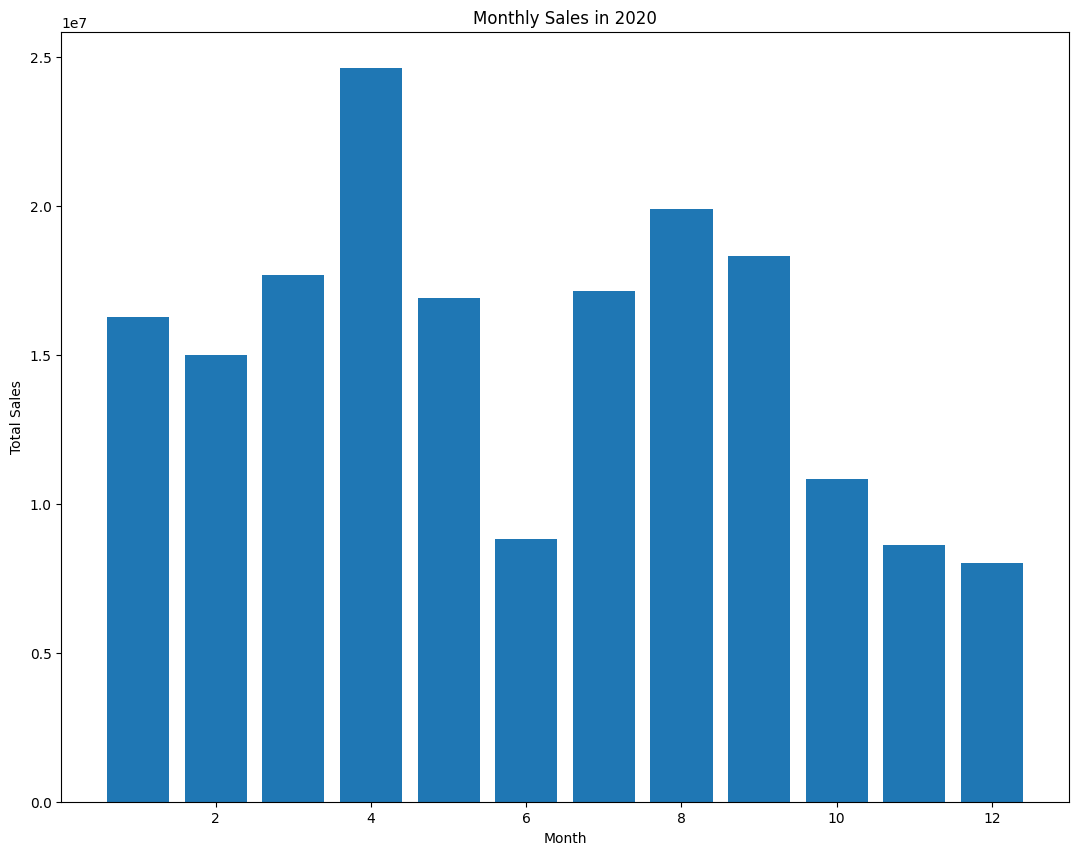

In [58]:
# j)	Draw plot to show monthly sales in 2020 in every region
import matplotlib.pyplot as plt
d = pd.to_datetime(data['Invoice Date'])
monthly_sales = data.loc[d.dt.year == 2020]['Total Sales'].groupby(d.dt.month).sum()
plt.figure(figsize=(13, 10))
plt.bar(monthly_sales.index, monthly_sales)
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales in 2020')

Text(0.5, 1.0, 'Yearly Sales in 2020')

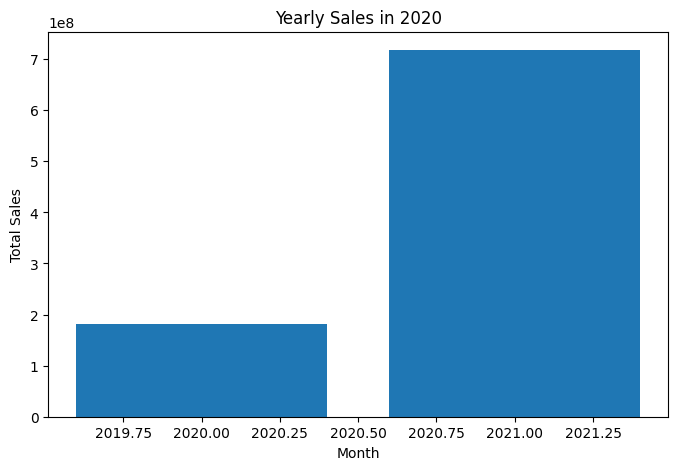

In [59]:
# k)	Draw the plot to show year wise sales in every region.
yearly_sales = data.groupby(d.dt.year)['Total Sales'].sum()
plt.figure(figsize=(8, 5))
plt.bar(yearly_sales.index, yearly_sales)
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Yearly Sales in 2020')

<Axes: xlabel='Invoice Date,Region'>

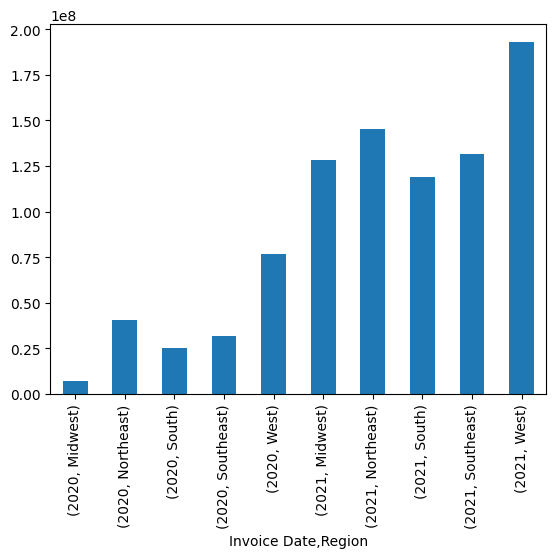

In [89]:
# l)	Draw plots to show Region wise sales in every year.
region_sales = data.groupby([d.dt.year,'Region'])['Total Sales'].sum()
# plt.figure(figsize=(8, 5))
# plt.bar(region_sales.index, region_sales.columns)
# plt.xlabel('Month')
# plt.ylabel('Year and Region Wise')
# plt.title('Region Sales in 2020')
# region_sales
region_sales.plot(x="year", y=["Region", "Total Sales"], kind="bar")
